## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('healthcare_data.csv')
data.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2.0,No,3554.835677,9.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68069 entries, 0 to 68068
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  68069 non-null  int64  
 1   Department                         68069 non-null  object 
 2   Ward_Facility_Code                 68069 non-null  object 
 3   doctor_name                        68069 non-null  object 
 4   staff_available                    68069 non-null  int64  
 5   patientid                          68069 non-null  int64  
 6   Age                                68069 non-null  object 
 7   gender                             68068 non-null  object 
 8   Type of Admission                  68068 non-null  object 
 9   Severity of Illness                68068 non-null  object 
 10  health_conditions                  68068 non-null  object 
 11  Visitors with Patient              68068 non-null  flo

In [4]:
data['patientid'].nunique()

51528

In [5]:
data['patientid'].value_counts()

127668    6
3571      6
126701    6
126378    6
125983    6
         ..
78232     1
80844     1
79811     1
46934     1
29867     1
Name: patientid, Length: 51528, dtype: int64

In [6]:
data['doctor_name'].nunique()

9

The above shows that patient ID has been repeated in the dataset. This could be because a patient can be with multiple doctors.

In [7]:
data.groupby(['Department'])['patientid'].count().sort_values(ascending = False)

Department
gynecology            46764
radiotherapy          11450
anesthesia             5984
TB & Chest disease     3135
surgery                 736
Name: patientid, dtype: int64

Gynecology has the highest number of patients

In [8]:
data.groupby(['Insurance'])['patientid'].count().sort_values(ascending = False)

Insurance
Yes    67785
No       283
Name: patientid, dtype: int64

In [9]:
data['patientid'] = str(data['patientid']) # converting patient id into string data type

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,68069.0,3.654145,2.722493,0.000000,2.000000,3.000000,4.000000,24.000000
staff_available,68069.0,5.028016,3.158223,0.000000,2.000000,5.000000,8.000000,10.000000
Visitors with Patient,68068.0,3.549010,2.239484,0.000000,2.000000,3.000000,4.000000,32.000000
Admission_Deposit,68068.0,4731.786706,1048.822917,1776.898276,4075.160582,4632.588671,5099.859306,9451.389018
Stay (in days),68068.0,12.393151,7.925365,3.000000,8.000000,9.000000,11.000000,49.000000


In [11]:
data.describe(include = 'O')

,Department,Ward_Facility_Code,doctor_name,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance
count,68069,68069,68069,68069,68069,68068,68068,68068,68068,68068
unique,5,6,9,1,10,3,3,3,6,2
top,gynecology,F,Dr Olivia,0 33070\n1 34808\n2 44...,21-30,Female,Trauma,Moderate,None,Yes
freq,46764,16466,14088,68069,21512,48526,42229,39855,18358,67785


In [12]:
data.groupby(['gender'])['patientid'].count()

gender
Female    48526
Male      17762
Other      1780
Name: patientid, dtype: int64

In [13]:
data.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               1
Type of Admission                    1
Severity of Illness                  1
health_conditions                    1
Visitors with Patient                1
Insurance                            1
Admission_Deposit                    1
Stay (in days)                       1
dtype: int64

There are no null values in the data.

In [14]:
data.duplicated().sum()

0

There are no duplicate entries in the data.

In [15]:
data.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,0 33070\n1 34808\n2 44...,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0


In [16]:
num_cols = data.select_dtypes(np.number).columns.values
num_cols
cat_cols = data.drop(data[num_cols], axis = 1)

In [17]:
cat_cols.head()

,Department,Ward_Facility_Code,doctor_name,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance
0,gynecology,D,Dr Sophia,0 33070\n1 34808\n2 44...,41-50,Female,Trauma,Extreme,Diabetes,Yes
1,gynecology,B,Dr Sophia,0 33070\n1 34808\n2 44...,31-40,Female,Trauma,Minor,Heart disease,No
2,gynecology,B,Dr Sophia,0 33070\n1 34808\n2 44...,21-30,Female,Trauma,Extreme,Diabetes,Yes
3,gynecology,D,Dr Olivia,0 33070\n1 34808\n2 44...,31-40,Female,Urgent,Moderate,None,No
4,anesthesia,E,Dr Mark,0 33070\n1 34808\n2 44...,71-80,Male,Trauma,Moderate,Diabetes,No


# **Univariate Analyses**

In [18]:
def box_bar(df, feature, kde, bin):
  plt.figure(figsize = (12, 7))
  fig, ax = plt.subplots(2, 1, sharex = True, gridspec_kw= {'height_ratios': (1, 2)})
  sns.boxplot(data = df, x = feature, showmeans = True, color = 'orange', ax = ax[0])
  sns.histplot(data = df, x = feature, kde = kde, bins = bin, ax = ax[1])
  ax[1].axvline(df[feature].mean(), linestyle = '-.', color = 'orange')
  ax[1].axvline(df[feature].median(), linestyle = '--', color = 'green')
  plt.show()

<Figure size 1200x700 with 0 Axes>

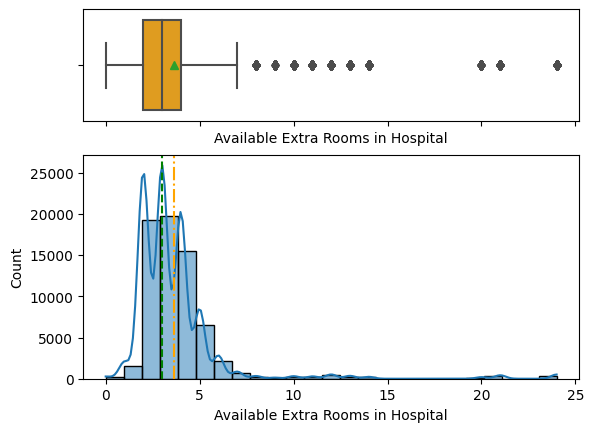

In [19]:
box_bar(data, 'Available Extra Rooms in Hospital', True, 25)

<Figure size 1200x700 with 0 Axes>

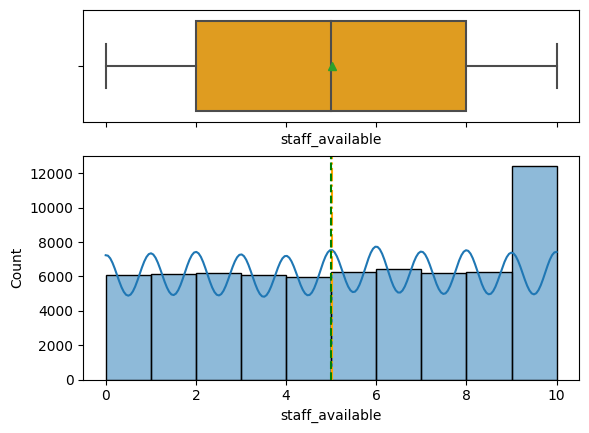

In [20]:
box_bar(data, 'staff_available', True, 10)

<Figure size 1200x700 with 0 Axes>

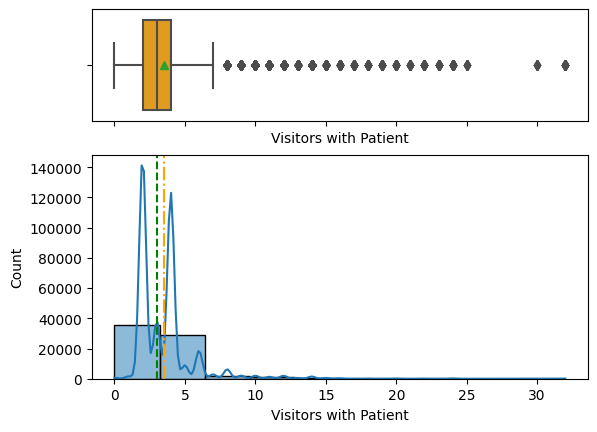

<Figure size 1200x700 with 0 Axes>

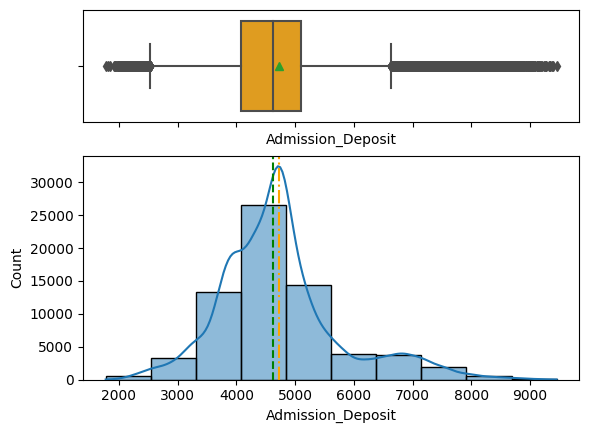

In [21]:
box_bar(data, 'Visitors with Patient', True, 10)
box_bar(data, 'Admission_Deposit', True, 10)

<Figure size 1200x700 with 0 Axes>

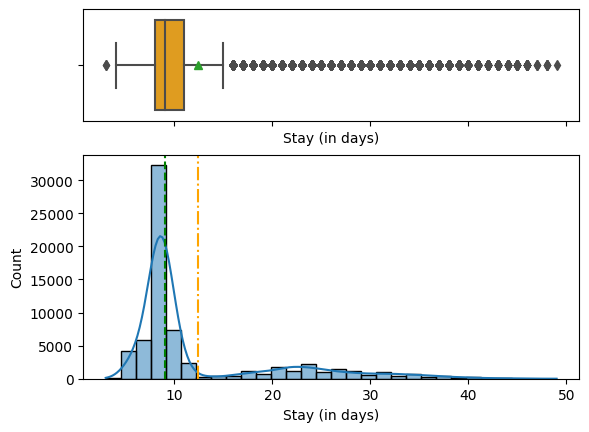

In [22]:
box_bar(data, 'Stay (in days)', True, 30)

In [23]:
df = data.drop('patientid', axis = 1)
df.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0


#**Bivariate Analyses**

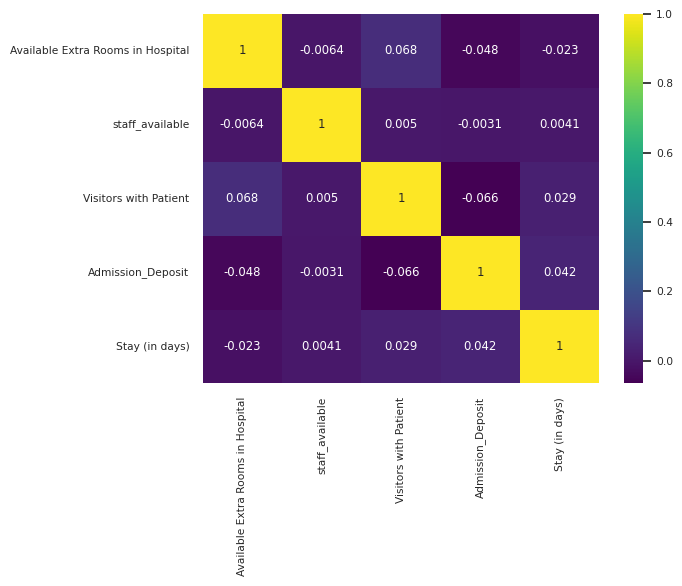

In [24]:
from seaborn._core.properties import FontSize
corr = df.corr()
corr

sns.set(font_scale = 0.7)
sns.heatmap(corr, annot= True, cmap = 'viridis')
plt.show()

The numerical variables are hardly correlated with each other.

In [25]:
df.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2.0,No,3554.835677,9.0


In [26]:
def bar_box(data, x, y, z):
  fig, ax = plt.subplots(2, 1, sharex= False, gridspec_kw= {'height_ratios': (1, 2)}, figsize = (10, 7))
  sns.boxplot(data = data, x = z, y = y, ax = ax[0])
  sns.barplot(data = data, x = x, y = y, estimator='mean', hue = z, ci = None,
              order = df.groupby([x])[y].mean().sort_values(ascending = False).index, ax = ax[1])
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
  plt.show()


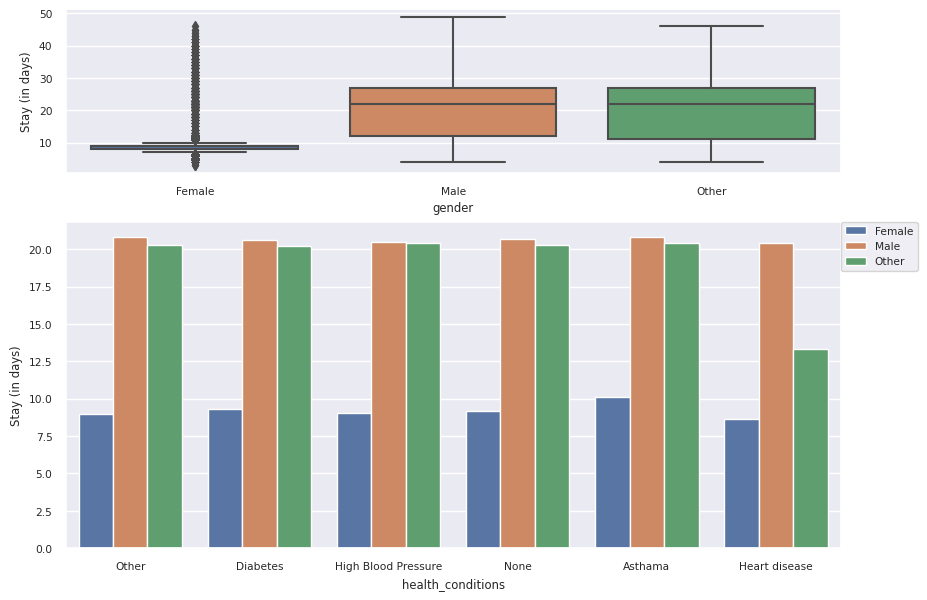

In [27]:
bar_box(df, 'health_conditions', 'Stay (in days)', 'gender')

Men have a longer stay than other gender categories.

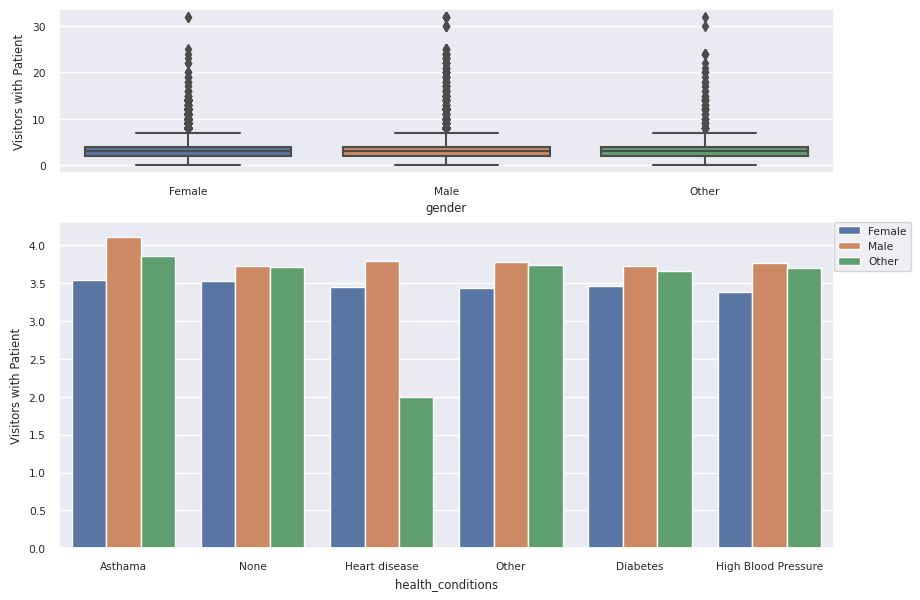

In [28]:
bar_box(df, 'health_conditions', 'Visitors with Patient', 'gender')

In [29]:
cat_cols.head(1)
cat_cols.columns

Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'patientid', 'Age',
       'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Insurance'],
      dtype='object')

In [30]:
for i in cat_cols.columns:
  cat_count = cat_cols.groupby([i])[i].count()
  print(cat_count)

Department
TB & Chest disease     3135
anesthesia             5984
gynecology            46764
radiotherapy          11450
surgery                 736
Name: Department, dtype: int64
Ward_Facility_Code
A     6370
B    14125
C     1966
D    16173
E    12969
F    16466
Name: Ward_Facility_Code, dtype: int64
doctor_name
Dr Isaac       595
Dr John       3402
Dr Mark       7646
Dr Nathan    10065
Dr Olivia    14088
Dr Sam        9521
Dr Sarah      9641
Dr Simon       141
Dr Sophia    12970
Name: doctor_name, dtype: int64
patientid
0         33070\n1         34808\n2         44577\n3          3695\n4        108956\n          ...  \n68064     32800\n68065     29867\n68066    114736\n68067    122154\n68068      5867\nName: patientid, Length: 68069, dtype: int64    68069
Name: patientid, dtype: int64
Age
0-10        476
11-20      4532
21-30     21512
31-40     20048
41-50     11046
51-60      2988
61-70      3620
71-80      2520
81-90      1123
91-100      204
Name: Age, dtype: int64
gender
Fem

# **Import ML Libraries**

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm

In [32]:
df.head(1)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0


In [33]:
df = pd.get_dummies(df, drop_first= True)
df.head()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4.0,2966.408696,8.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,4,2,2.0,3554.835677,9.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,2,8,2.0,5624.733654,7.0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,4,7,4.0,4814.149231,8.0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,2,10,2.0,5169.269637,34.0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [34]:
x = df.drop('Stay (in days)', axis = 1)
y = df['Stay (in days)']

In [35]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle = True, random_state= 1)

In [37]:
x_train.head(1)

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
6954,2,3,8.0,4573.050596,0,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1


In [38]:
print("The shape of x_train: ", x_train.shape, sep = "")
print("The shape of y_train: ", y_train.shape, sep = "")
print("The shape of x_test: ", x_test.shape, sep = "")
print("The shape of y_test: ", y_test.shape, sep = "")

The shape of x_train: (54455, 42)
The shape of y_train: (54455,)
The shape of x_test: (13614, 42)
The shape of y_test: (13614,)


In [39]:
scaler = MinMaxScaler()

In [40]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [41]:
x_train_scaled = pd.DataFrame(x_train_scaled, index =x_train.index, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, index =x_test.index, columns = x_test.columns)

In [42]:
x_train_scaled.head(1)

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
6954,0.083333,0.3,0.25,0.364344,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
x_train_scaled1 = sm.add_constant(x_train_scaled)
x_train_scaled1.head(1)

,const,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
6954,1.0,0.083333,0.3,0.25,0.364344,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [44]:
x_test_scaled1 = sm.add_constant(x_test_scaled)
x_test_scaled1.head(1)

,const,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
32173,1.0,0.375,0.7,0.125,0.246885,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
x_train_scaled1 = x_train_scaled1.dropna()

In [46]:
x_train_scaled1[x_train_scaled1.isna().any(axis=1)]

,const,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes


In [47]:
y_train[y_train.isna()]

68068   NaN
Name: Stay (in days), dtype: float64

In [48]:
y_train = y_train.dropna()

In [49]:
ols1 = sm.OLS(y_train, x_train_scaled1).fit()
ols1.summary()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     7615.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:42:59   Log-Likelihood:            -1.3988e+05
No. Observations:               54454   AIC:                         2.798e+05
Df Residuals:                   54415   BIC:                         2.802e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [50]:
model_performance_regression(ols1, x_train_scaled1 , y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.15783,2.149731,0.841716,0.841591,19.526437


In [51]:
model_performance_regression(ols1, x_test_scaled1, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.140421,2.14334,0.841059,0.840555,19.725594


**Observations:**

- **The Root Mean Squared Error** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within **mean error of 2.15 days** on the test data.

- The units of both RMSE and MAE are the same - days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~19%** on the test data, indicating that the average difference between the predicted value and the actual value is ~19%.

# **Checking for Multicollinearity**

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [53]:
print(checking_vif(x_train_scaled1))

                                  feature           VIF
0                                   const  0.000000e+00
1       Available Extra Rooms in Hospital  1.022828e+00
2                         staff_available  1.003320e+00
3                   Visitors with Patient  1.029460e+00
4                       Admission_Deposit  1.020224e+00
5                   Department_anesthesia  2.744323e+00
6                   Department_gynecology           inf
7                 Department_radiotherapy  1.334492e+01
8                      Department_surgery  7.680461e+09
9                    Ward_Facility_Code_B           inf
10                   Ward_Facility_Code_C  1.375239e+00
11                   Ward_Facility_Code_D           inf
12                   Ward_Facility_Code_E  2.864222e+00
13                   Ward_Facility_Code_F           inf
14                    doctor_name_Dr John  3.162929e+10
15                    doctor_name_Dr Mark  1.499408e+08
16                  doctor_name_Dr Nathan  1.352

- All the continuous variables have VIF less than 5, which makes sense according to what we observed in correlation heatmap.

# Try Dropping the insignificant variables.

In [54]:
x_train_scaled2 = x_train_scaled1.drop(['Visitors with Patient', 'staff_available',], axis = 1)
x_test_scaled2 = x_test_scaled1.drop(['Visitors with Patient', 'staff_available'], axis = 1)

In [55]:
ols2 = sm.OLS(y_train, x_train_scaled2).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     8037.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:43:09   Log-Likelihood:            -1.3989e+05
No. Observations:               54454   AIC:                         2.798e+05
Df Residuals:                   54417   BIC:                         2.802e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [56]:
model_performance_regression(ols2, x_train_scaled2, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.158049,2.15051,0.841694,0.841575,19.516453


In [57]:
model_performance_regression(ols2, x_test_scaled2, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.140183,2.143625,0.841083,0.840603,19.708413


In [58]:
residuals = ols2.resid

In [59]:
residuals.mean()

0.024108708117586235

<Axes: ylabel='Count'>

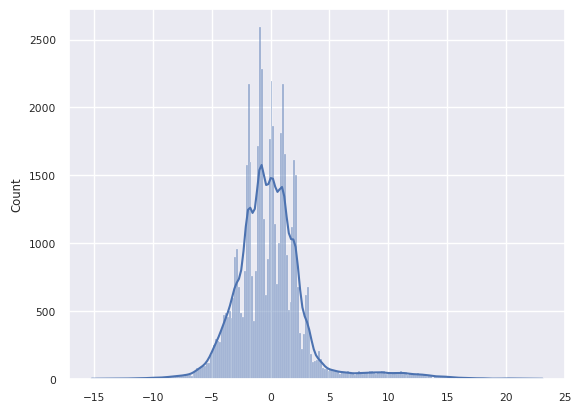

In [60]:
sns.histplot(residuals, kde = True)

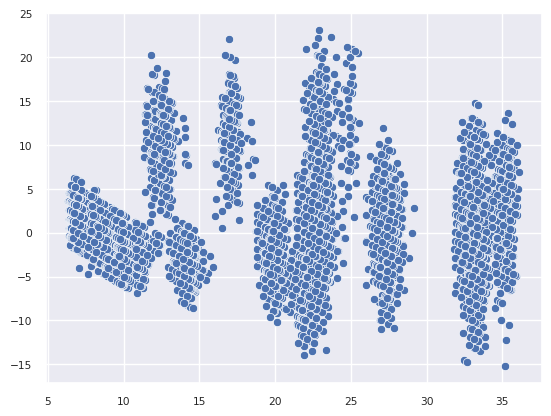

In [61]:
fitted = ols2.fittedvalues

sns.scatterplot(x = fitted, y = residuals)
plt.show()

In [63]:
coeffs = ols2.params
coeffs

const                                   -8.949206e+10
Available Extra Rooms in Hospital        1.512972e+00
Admission_Deposit                       -2.333926e-01
Department_anesthesia                    5.887558e+00
Department_gynecology                    5.364880e+11
Department_radiotherapy                 -4.738256e+00
Department_surgery                       8.002278e+10
Ward_Facility_Code_B                    -2.813431e+11
Ward_Facility_Code_C                     5.015309e-01
Ward_Facility_Code_D                    -2.813431e+11
Ward_Facility_Code_E                     3.686436e-01
Ward_Facility_Code_F                    -2.813431e+11
doctor_name_Dr John                      8.949206e+10
doctor_name_Dr Mark                      8.002278e+10
doctor_name_Dr Nathan                   -1.656528e+11
doctor_name_Dr Olivia                   -1.656528e+11
doctor_name_Dr Sam                       8.002278e+10
doctor_name_Dr Sarah                    -1.656528e+11
doctor_name_Dr Simon        

## **Linear Regression & Regularization Methods**

In [64]:
x_train_scaled2

,const,Available Extra Rooms in Hospital,Admission_Deposit,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
6954,1.0,0.083333,0.364344,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29273,1.0,0.083333,0.559985,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
36690,1.0,0.208333,0.280744,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9926,1.0,0.083333,0.493696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
34492,1.0,0.125000,0.345002,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,1.0,0.166667,0.369823,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
20609,1.0,0.125000,0.550478,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
21440,1.0,0.083333,0.347008,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
50057,1.0,0.083333,0.387590,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [74]:
y_train

6954      9.0
29273     9.0
36690    20.0
9926     20.0
34492     8.0
         ... 
49100     9.0
20609    30.0
21440     9.0
50057    13.0
5192      8.0
Name: Stay (in days), Length: 54454, dtype: float64

In [76]:
model.fit(x_train_scaled2, y_train)

LinearRegression()

In [78]:
linear_reg = model_performance_regression(model, x_train_scaled2, y_train)
linear_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.15792,2.15039,0.841707,0.841588,19.531798


In [80]:
# Checking performance on the testing data
linear_reg_test = model_performance_regression(model, x_test_scaled2, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.140136,2.143717,0.841087,0.840607,19.726873


## **Ridge Model**

In [81]:
ridge_model = Ridge()

In [82]:
ridge_model.fit(x_train_scaled2, y_train)

Ridge()

In [83]:
ridge_reg = model_performance_regression(ridge_model, x_train_scaled2, y_train)
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.157946,2.150852,0.841704,0.841585,19.539293


In [84]:
model_performance_regression(ridge_model, x_test_scaled2, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.140216,2.144209,0.841079,0.840599,19.734717


## Ridge with optimized $\large\alpha$

In [85]:
folds = KFold(n_splits = 10, shuffle = True, random_state= 1)
params = {'alpha': (0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 1.5, 2, 3, 5, 10, 20)}

model = Ridge()
model_cv = GridSearchCV(estimator = model, param_grid = params, scoring= 'r2', cv = folds, return_train_score= True)
model_cv.fit(x_train_scaled2, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': (0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 1.5, 2,
                                   3, 5, 10, 20)},
             return_train_score=True, scoring='r2')

In [86]:
model_cv.best_params_

{'alpha': 0.2}

In [87]:
ridge_model_tuned = Ridge(alpha = 0.2)

In [88]:
ridge_model_tuned.fit(x_train_scaled2, y_train)

Ridge(alpha=0.2)

In [89]:
model_performance_regression(ridge_model_tuned, x_train_scaled2, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.157926,2.150528,0.841706,0.841587,19.533841


In [90]:
model_performance_regression(ridge_model_tuned, x_test_scaled2, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.140149,2.143853,0.841086,0.840606,19.728917


## **Lasso Regresson**

In [91]:
lasso_model = Lasso()

In [92]:
lasso_model.fit(x_train_scaled2, y_train)

Lasso()

In [94]:
lasso_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [95]:
model_performance_regression(lasso_model, x_train_scaled2, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.037442,3.845429,0.421417,0.420981,34.316986


## Tuning Lasso Model

In [102]:
model = Lasso()
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)
params = {'alpha': (0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 2, 2.5, 3, 5, 10, 15, 20)}

model_cv_lasso = GridSearchCV(estimator = model, param_grid = params, scoring = 'r2', cv = folds, return_train_score = True)


In [103]:
model_cv_lasso.fit(x_train_scaled2, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': (0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1,
                                   1.5, 2, 2.5, 3, 5, 10, 15, 20)},
             return_train_score=True, scoring='r2')

In [104]:
model_cv_lasso.best_params_

{'alpha': 0.001}

In [105]:
lasso_tuned = Lasso(alpha = 0.001)

lasso_tuned.fit(x_train_scaled2, y_train)

Lasso(alpha=0.001)

In [106]:
model_performance_regression(lasso_tuned, x_train_scaled2, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.158274,2.151585,0.841671,0.841552,19.55543


In [108]:
model_performance_regression(lasso_tuned, x_test_scaled2, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.140672,2.145154,0.841033,0.840553,19.752203


In [110]:
lasso_tuned.predict(x_test_scaled2)

array([10.59158432,  8.03664368, 33.67826807, ...,  9.86807372,
        9.97400278,  6.83795342])

In [112]:
coeffs = lasso_tuned.coef_
coeffs

array([ 0.00000000e+00,  1.43610008e+00, -1.79363344e-01,  5.86629492e+00,
       -6.10475195e+00, -4.62168367e+00,  8.07154847e+00,  1.02492838e-02,
        4.43131999e-01, -3.49348254e-02,  3.44937992e-01, -1.97467170e-01,
        2.64713079e-01, -4.86133223e-02, -6.86534731e-01, -8.31902098e-01,
        0.00000000e+00,  4.82388072e-01,  0.00000000e+00, -0.00000000e+00,
       -1.25545556e+01, -1.02896273e+01, -1.31909628e+01, -1.33527752e+01,
        0.00000000e+00, -2.72233003e-01,  8.01025653e-02,  1.57838755e-01,
        0.00000000e+00, -0.00000000e+00, -2.62743696e-01, -7.71881773e-02,
        1.45004604e-01,  5.25651766e-03,  8.13607687e-02, -3.90627234e-01,
        4.97612758e-01, -3.44908334e-02,  9.82522795e-02,  1.52699711e-01,
       -0.00000000e+00])

In [113]:
intercept = lasso_tuned.intercept_
intercept

26.835909398302366

In [114]:
sparse_coeffs = lasso_tuned.sparse_coef_
sparse_coeffs

<1x41 sparse matrix of type '<class 'numpy.float64'>'
	with 33 stored elements in Compressed Sparse Row format>

## **Elastic Net Regression**

In [116]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet()

In [117]:
folds = KFold(n_splits=5, shuffle = True, random_state = 1)
params = {'alpha': (0.001, 0.002, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 1.5, 2, 3, 5, 10, 15, 20),
          'l1_ratio': (0.001, 0.002, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6) }
model_en_cv = GridSearchCV(estimator = model_en, param_grid = params, scoring = 'r2', cv = folds, return_train_score = True)

model_en_cv.fit(x_train_scaled2, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': (0.001, 0.002, 0.01, 0.02, 0.03, 0.05, 0.1,
                                   0.2, 0.3, 0.5, 1, 1.5, 2, 3, 5, 10, 15, 20),
                         'l1_ratio': (0.001, 0.002, 0.01, 0.02, 0.03, 0.05, 0.1,
                                      0.2, 0.3, 0.5, 0.6)},
             return_train_score=True, scoring='r2')

In [118]:
model_en_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.6}

In [120]:
final_model_en = ElasticNet(alpha = 0.001, l1_ratio = 0.6)

In [121]:
final_model_en.fit(x_train_scaled2, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.6)

In [122]:
model_performance_regression(final_model_en, x_train_scaled2, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.162936,2.161063,0.841204,0.841084,19.682298


In [123]:
model_performance_regression(final_model_en, x_test_scaled2, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.14655,2.156224,0.840438,0.839956,19.890343


## **Forward Feature Selection**

In [ ]:
!pip install mlxtend

In [130]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [126]:
reg = LinearRegression()

In [131]:
sfs = SFS(
    reg,
    k_features = x_train_scaled2.shape[1],
    forward = True,
    floating = False,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2,
    cv = 5
)

In [ ]:
sfs = sfs.fit(x_train_scaled2, y_train)

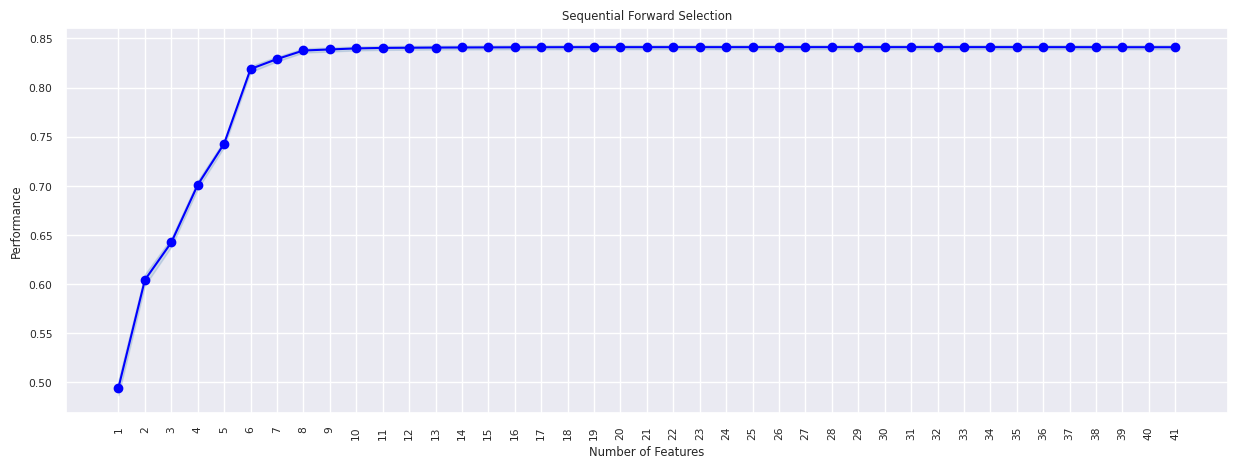

In [133]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sfs.get_metric_dict()

In [ ]:
sfs = SFS(
    reg,
    k_features = 8,
    forward = True,
    floating = False,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 2,
    cv = 5
)

sfs.fit(x_train_scaled2, y_train)

In [137]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols

[3, 4, 5, 6, 20, 21, 22, 23]

In [138]:
x_train_scaled2.columns[feat_cols]

Index(['Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Age_11-20',
       'Age_21-30', 'Age_31-40', 'Age_41-50'],
      dtype='object')

In [139]:
x_train_final = x_train_scaled2[x_train_scaled2.columns[feat_cols]]
x_test_final = x_test_scaled2[x_test_scaled2.columns[feat_cols]]

In [140]:
reg_model2 = LinearRegression()

In [141]:
reg_model2.fit(x_train_final, y_train)

LinearRegression()

In [143]:
model_performance_regression(reg_model2, x_train_final, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.193545,2.171828,0.838115,0.838091,19.705522


In [144]:
model_performance_regression(reg_model2, x_test_final, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.173905,2.168043,0.837651,0.837556,19.911077


In [146]:
reg_model2.coef_

array([  5.82610863,  -6.73352173,  -4.57906064,   7.86808091,
       -11.85362488, -10.47900718, -12.97890949, -13.27434841])

* The new model (**reg_model2**) uses 8 features in comparison to 42 features for the previous model (**linear_reg**), i.e., the number of features has reduced by ~81%.
* The performance of the new model, however, is very close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.